<a href="https://colab.research.google.com/github/Guhan2348519/Guhan2348519/blob/main/2348519_RL_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np

class KBanditProblem:
    """
    Class representing the K-armed bandit problem.

    Parameters:
    -----------
    k : int
        Number of arms in the bandit.
    stationary : bool, optional
        If False, the values of the arms will change over time (non-stationary problem).
    """

    def __init__(self, k, stationary=True):
        self.k = k
        self.stationary = stationary
        self.values = np.random.normal(loc=0.0, scale=1.0, size=k)
        self.optimal = self.values.argmax()  # Index of the optimal action
        self.rewards_history = []  # Track all rewards

    def generate_reward(self, action):
        """
        Generate a reward for a given action.

        Parameters:
        -----------
        action : int
            The index of the action taken.

        Returns:
        --------
        float
            The reward generated for the action.
        """
        if not self.stationary:
            # For non-stationary problems, slightly change the values
            self.values += np.random.normal(loc=0.0, scale=0.01, size=self.k)
            self.optimal = self.values.argmax()  # Update the optimal action

        # Generate a random reward based on a normal distribution
        reward = np.random.normal(loc=self.values[action], scale=1.0)
        self.rewards_history.append(reward)  # Keep track of all rewards
        return reward

    def get_optimal_action(self):
        """
        Get the current optimal action.

        Returns:
        --------
        int
            Index of the optimal action.
        """
        return self.optimal

    def reset(self):
        """
        Reset the bandit problem with new values.
        """
        self.values = np.random.normal(loc=0.0, scale=1.0, size=self.k)
        self.optimal = self.values.argmax()
        self.rewards_history = []

# Example of usage in a larger collaboration
if __name__ == "__main__":
    bandit = KBanditProblem(k=10, stationary=False)

    # Example reward generation for a chosen action
    chosen_action = 2
    reward = bandit.generate_reward(chosen_action)
    print(f"Action {chosen_action} generated reward: {reward}")

Action 2 generated reward: -1.9112351483420638


In [ ]:
import numpy as np

class KBanditSolution:
    """
    A class to simulate solving a K-armed bandit problem and tracking performance statistics.

    Parameters:
    -----------
    problem : KBanditProblem
        An instance of the KBanditProblem class representing the bandit problem.
    steps : int
        The number of steps to run the simulation.

    Attributes:
    -----------
    average_reward : float
        The current average reward after each step.
    average_rewards : np.ndarray
        An array to store the average reward at each step.
    optimal_percentage : float
        The current percentage of selecting the optimal action.
    optimal_percentages : np.ndarray
        An array to store the optimal action percentage at each step.
    """

    def __init__(self, problem, steps):
        self.problem = problem
        self.steps = steps

        self.average_reward = 0.0
        self.average_rewards = np.zeros(steps)  # Pre-allocate array for efficiency
        self.optimal_percentage = 0.0
        self.optimal_percentages = np.zeros(steps)  # Pre-allocate array for efficiency

    def count_statistics(self, action, reward, step):
        """
        Update statistics for average rewards and optimal action selection.

        Parameters:
        -----------
        action : int
            The action chosen at the current step.
        reward : float
            The reward received after taking the action.
        step : int
            The current step in the simulation (0-indexed).
        """
        # Incrementally update the average reward
        self.average_reward += (1 / (step + 1)) * (reward - self.average_reward)

        # Incrementally update the percentage of optimal action selection
        is_optimal = 1 if action == self.problem.get_optimal_action() else 0
        self.optimal_percentage += (1 / (step + 1)) * (is_optimal - self.optimal_percentage)

        # Store statistics in arrays for later analysis
        self.average_rewards[step] = self.average_reward
        self.optimal_percentages[step] = self.optimal_percentage

    def get_statistics(self):
        """
        Retrieve the accumulated statistics for rewards and optimal action percentages.

        Returns:
        --------
        tuple:
            A tuple containing two numpy arrays: (average_rewards, optimal_percentages)
        """
        return self.average_rewards, self.optimal_percentages

In [ ]:
class EGreedy(KBanditSolution):

    def solve(self, exploration_rate, initial_value):
        Q = {i: initial_value for i in range(k)} # 1. Value function
        N = {i: 0 for i in range(k)} # 2. Number of actions, for update rule

        for i in range(self.steps): # 3. Main loop
            explore = random.uniform(0, 1) < exploration_rate  # 4. Exploration
            if explore:
                action = random.randint(0, k - 1) # 5. Exploration: Choosing random action
            else:
                action = max(Q, key=Q.get) # 6. Choose action with maximum mean reward

            reward = self.problem.generate_reward(action) # 7. Get reward for current action
            N[action] += 1 # 8. Update action number
            Q[action] += (1 / N[action]) * (reward - Q[action]) # 9. Update value dict
            self.count_statistics(action, reward, i)

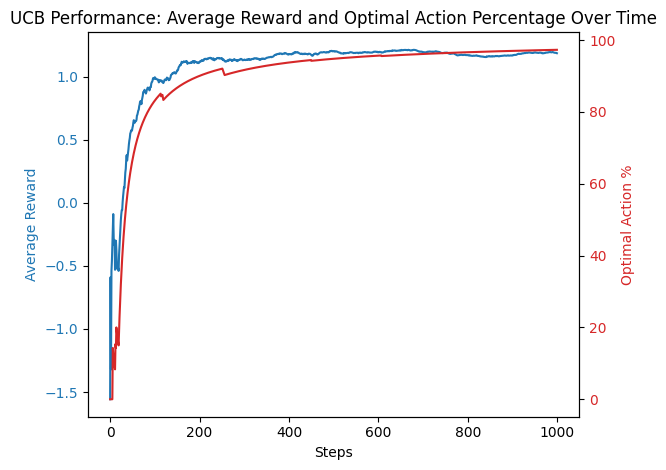

In [ ]:

import numpy as np
import sys
from math import sqrt, log
import random
import matplotlib.pyplot as plt

class KBanditProblem:
    """
    Defines the K-armed bandit problem.

    Attributes:
    -----------
    k : int
        The number of arms (actions) in the bandit problem.
    stationary : bool
        Whether the problem is stationary (the true values do not change).
    values : np.array
        The true values for each arm.
    optimal : int
        The index of the arm with the highest true value.
    """

    def __init__(self, k, stationary=True):
        self.k = k
        self.stationary = stationary
        self.values = np.random.normal(loc=0.0, scale=1, size=k)
        self.optimal = self.values.argmax()

    def generate_reward(self, action):
        """
        Generate a reward for the given action, with optional drift if non-stationary.

        Parameters:
        -----------
        action : int
            The selected action (arm).

        Returns:
        --------
        float
            The reward for the chosen action.
        """
        if not self.stationary:
            # Add a small random drift to the true values of all arms
            self.values += np.random.normal(loc=0.0, scale=0.01, size=self.k)
            self.optimal = self.values.argmax()
        return np.random.normal(loc=self.values[action], scale=1)

class KBanditSolution:
    """
    Tracks the solution to the K-bandit problem, recording statistics.

    Attributes:
    -----------
    problem : KBanditProblem
        The K-armed bandit problem to be solved.
    steps : int
        The number of steps (iterations) in the solution.
    """

    def __init__(self, problem, steps):
        self.problem = problem
        self.steps = steps

        self.average_reward = 0
        self.average_rewards = np.array([])
        self.optimal_percentage = 0
        self.optimal_percentages = np.array([])

    def count_statistics(self, action, reward, step):
        """
        Update the statistics for tracking average rewards and optimal action selection.

        Parameters:
        -----------
        action : int
            The selected action (arm).
        reward : float
            The reward received for the action.
        step : int
            The current step (iteration).
        """
        self.average_reward += (1 / (step + 1)) * (reward - self.average_reward)
        self.optimal_percentage += (1 / (step + 1)) * ((1 if action == self.problem.optimal else 0) - self.optimal_percentage)
        self.average_rewards = np.append(self.average_rewards, self.average_reward)
        self.optimal_percentages = np.append(self.optimal_percentages, self.optimal_percentage)

    def get_statistics(self):
        """
        Get the average rewards and optimal action percentages.

        Returns:
        --------
        np.array, np.array
            The average rewards and optimal action percentages over all steps.
        """
        return self.average_rewards, self.optimal_percentages

class UCB(KBanditSolution):
    """
    A class to solve the K-armed bandit problem using the Upper Confidence Bound (UCB) algorithm.

    Inherits from KBanditSolution to track statistics over time.
    """

    def count_ucb(self, q, c, step, n):
        """
        Calculate the UCB value for a given action.

        Parameters:
        -----------
        q : float
            The current value estimate for the action.
        c : float
            The exploration parameter that controls how much to explore.
        step : int
            The current step of the simulation.
        n : int
            The number of times the action has been chosen.

        Returns:
        --------
        float
            The UCB value for the action.
        """
        if n == 0:
            return sys.maxsize  # Force exploration if action hasn't been tried
        return q + (c * sqrt(log(step) / n))

    def solve(self, c):
        """
        Solve the K-armed bandit problem using the UCB algorithm.

        Parameters:
        -----------
        c : float
            The exploration parameter for the UCB algorithm.
        """
        k = self.problem.k  # Number of arms in the bandit
        Q = {i: 0 for i in range(k)}  # 1. Action-value estimates
        N = {i: 0 for i in range(k)}  # 2. Number of times each action was chosen

        # 3. Main loop: Iterate through each step of the problem
        for i in range(self.steps):
            # 4. Compute UCB values for all actions
            Q_ucb = {i: self.count_ucb(Q[i], c, i + 1, N[i]) for i in range(k)}

            # 5. Select the action with the highest UCB value
            action = max(Q_ucb, key=Q_ucb.get)

            # 6. Generate reward for the chosen action
            reward = self.problem.generate_reward(action)

            # 7. Update the number of times this action has been chosen
            N[action] += 1

            # 8. Update the action-value estimate using incremental averaging
            Q[action] += (1 / N[action]) * (reward - Q[action])

            # 9. Track statistics (average reward, optimal action percentage)
            self.count_statistics(action, reward, i)

def plot_results(average_rewards, optimal_percentages, steps):
    """
    Plot the average rewards and optimal action percentages over time.

    Parameters:
    -----------
    average_rewards : np.array
        Array of average rewards over time.
    optimal_percentages : np.array
        Array of optimal action percentages over time.
    steps : int
        The number of steps for which the algorithm was run.
    """
    # Create a figure with two subplots
    fig, ax1 = plt.subplots()

    # Plot average rewards
    ax1.set_xlabel('Steps')
    ax1.set_ylabel('Average Reward', color='tab:blue')
    ax1.plot(range(steps), average_rewards, color='tab:blue', label='Average Reward')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for the optimal action percentage
    ax2 = ax1.twinx()
    ax2.set_ylabel('Optimal Action %', color='tab:red')
    ax2.plot(range(steps), optimal_percentages * 100, color='tab:red', label='Optimal Action %')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add a title
    plt.title('UCB Performance: Average Reward and Optimal Action Percentage Over Time')

    # Show the plot
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Create a 10-armed non-stationary bandit problem
    k_bandit = KBanditProblem(k=10, stationary=False)

    # Solve the bandit problem using UCB over 1000 steps
    solution = UCB(problem=k_bandit, steps=1000)

    # Set exploration parameter for UCB
    c = 2.0

    # Solve the problem using UCB
    solution.solve(c)

    # Get final statistics
    avg_rewards, optimal_percentages = solution.get_statistics()

    # Plot the results
    plot_results(avg_rewards, optimal_percentages, steps=1000)